---

title: Classificação de imagens com o TensorFlow. 
author: '' 
date: '2024-03-23' 
slug: pythonCV 
categories: [] 
tags: [ "TensorFlow", "IA", "ML", "Imagens" , "classificação", "Python"] 
subtitle: 'Classificação de imagens utilizando rede neurais no Python com a biblioteca Tensorflow ' 
Summary: 'Classificação imagens utilizando rede neurais e Python' 
authors: [] 
lastmod: '2024-03-23T16:00:00-03:00' 
featured: yes 
image:
  caption: ''
  focal_point: ''
  preview_only: no
projects: []

---

Neste post é apresentado uma rotina de aprendizado de máquina supervisionado utilizando a biblioteca TensorFlow para realizar o reconhecimento e classificação de imagens da base de dados [MNIST](https://en.wikipedia.org/wiki/MNIST_database). Esta base de dados consiste em imagens de numeros escritos a mão e seus respectivos rótulos. A idéia deste post é treinar um modelo de rede neural que reconheça os padrões destas imagens e as classifiquem com o respectivo número.

O conteúdo desta atividade de classificação é composto de:
1. Importar as bibliotecas;
2. Importar o conjunto de dados e dividi-los entre base treino e de teste;
3. Aplicar o processo de Hot Encoding nas classes de respostas;
4. Pré-processamento dos dados para que possam ser uitilizados no treinamento da rede;
5. Criação do modelo de rede neural;
6. Treinamento do modelo com os dados de treinamento;
7. Realizar a predição e comparação com os dados de teste.


## 1. Importação das bibliotecas necessárias, incluindo o [TensorFlow](https://www.tensorflow.org/?hl=pt-br)

In [1]:
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

#Processo de hot-encoding
from tensorflow.keras.utils import to_categorical

#para criar as camadas do modelo de rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#para visualizar as imagens
from matplotlib import pyplot as plt
%matplotlib inline

2024-03-24 10:02:13.310353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 10:02:13.370354: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 10:02:13.371713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 10:02:14.341836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow version 2.13.1


## 2: Importar a base de dados e dividi-la em bases treino e de teste
A própria biblioteca [Tensorflow](https://www.tensorflow.org/datasets/catalog/mnist?hl=pt-br) já disponibiliza esta base.


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

### Dimensões dos arrays importados 

A base de dados MNIST é composta por 70000 imagens em escala de cinza de dimensões de 28 por 28 e seus respectivos rótulos. Neste trabalho esta base foi dividida com 60000 instancias de treino e 10000 de teste para poder verificar a performance do treinamento. Cada valor dos pixels representam um valor integral (entre 0 a 255) na escala de cinza.

In [3]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


### Visualizando uma imagem presente na base de treino

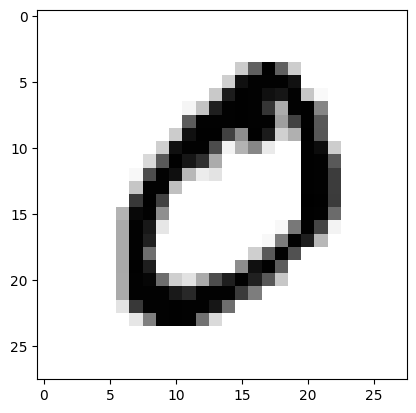

In [4]:
# Apresentando uma imagem da base de treino.
plt.imshow(x_train[1], cmap="binary")
plt.show()

### Para ver o seu rótulo de treino: 

In [5]:
# O valor da classe na posição 1
print(y_train[0]) #valor 5
print(y_train[1]) #valor 0

5
0


### Para ver todos os rótulos presentes na base de treino: 

In [6]:
# Os valores presentes na classe de treino
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## 3 - Processo de hot encoding nas classes.
Para que as classes de respostas possam passar pelo processo de treinamento e de testes, é necessario aplicar o processo de pré-processamento de hot encoding (criação de variaveis dummies) nas classes de respostas.

### Codificando os rótulos

In [7]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Conhecendo as dimensões das bases de dados codificadas

In [8]:
print("y_train_encoded shape", y_train_encoded.shape)
print("y_test_encoded shape", y_test_encoded.shape)

y_train_encoded shape (60000, 10)
y_test_encoded shape (10000, 10)


### Visualizando um rótulo codificado.

In [9]:
print(y_train_encoded[0]) #valor 5
print(y_train_encoded[1]) #valor 0

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 4 Pré-processamento.

### Transformar a matriz de 2 dimensões (28x28 pixels com valores de 0 a 255) em um uníco vetor de dimensão 784.

In [10]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print("x_train_reshaped_shape", x_train_reshaped.shape)
print("x_test_reshaped_shape", x_test_reshaped.shape)

x_train_reshaped_shape (60000, 784)
x_test_reshaped_shape (10000, 784)


### Normalização dos a

In [11]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped-x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped-x_mean) / (x_std + epsilon)

## 5: Criando o modelo de rede neural.
### Modelo será composto de uma camada de entrada, uma camada interna oculta e uma camada de saída.

In [12]:
model = Sequential([
    Dense(56, activation="relu",input_shape=(784,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

2024-03-24 10:02:16.922990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-24 10:02:16.923710: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Compilando o modelo

In [13]:
model.compile(
    optimizer="sgd",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
 
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                43960     
                                                                 
 dense_1 (Dense)             (None, 128)               7296      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 52546 (205.26 KB)
Trainable params: 52546 (205.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6 - Treinando o modelo

### Treinar o modelo com o base de dados de treino normalizado e com o a base de classe de treino codificado. O valor de epoch é a quantidade de vezes que os dados passam pela rede.

In [14]:
model.fit(x_train_norm, y_train_encoded, epochs=2)

Epoch 1/2


2024-03-24 10:02:17.328579: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.4276 - accuracy: 0.8749
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2094 - accuracy: 0.9380


### Avaliando a performance do modelo na base de teste.

In [15]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("Test set accuracy:", accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.1733 - accuracy: 0.9484
Test set accuracy: 94.84000205993652


## 7 - Predição

### Realizar a predição na base de teste normalizada

In [16]:
predit = model.predict(x_test_norm)
print("Shape of preds:", predit.shape)
#Para visualizar as previsões:
print("Valores previstos:",np.argmax(predit, axis = 1))

313/313 [==============================] - 0s 1ms/step
Shape of preds: (10000, 10)
Valores previstos: [7 2 1 ... 4 5 6]


### Visualizar os 36 primeiros valores da base de teste e u comparar entre a resposta conhecida e a predição feita pelo modelo.

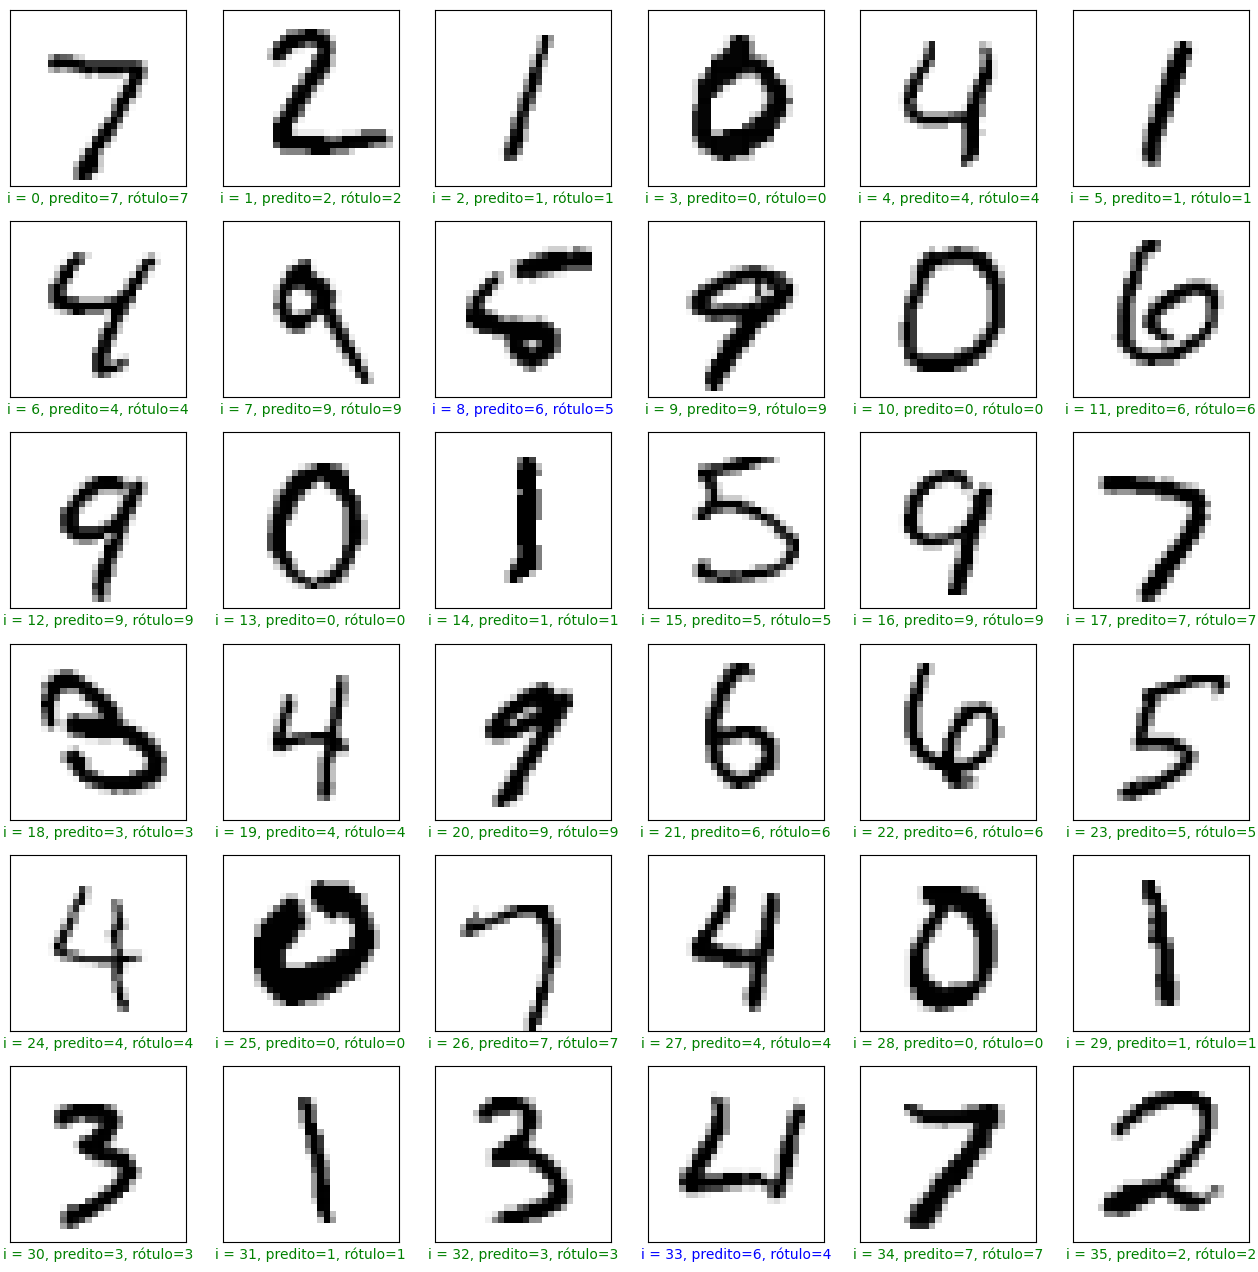

In [17]:
plt.figure(figsize=(16,16))

start_index = 0

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
        
    pred = np.argmax(predit[start_index + i])
    valor_teste = y_test[start_index + i]
    
    col = "g"
    if pred != valor_teste:
        col = "b"
    
    plt.xlabel("i = {}, predito={}, rótulo={}".format(start_index+i, pred, valor_teste), color = col)
    plt.imshow(x_test[start_index+i], cmap = "binary")
plt.show()

Nas primeiras 36 imagens, as imagens de indíce 8 e 33 foram preditas de forma incorreta por o modelo implementado.

## Conclusão: 
Este post apresentou um fluxo de trabalho para tarefas de classificação de imagens utilizando o TensorFlow, treinando-o para reconhecer os padrões dos dados presentes nesta base de dados. 

Foi realizado um pré-processamento dos dados para que os mesmos possam ser aplicado no treinamento da rede neural, criou-se o modelo, treinou o mesmo e verificou a performance deste treino comparando os valores preditos com os valores préviamente rotulados.

Alterações em alguns hiperparâmetros como por exemplo o tipo de otimizador, na geometria da rede, na quantidade de epochs podem ser utilizados para melhorar os resultados presentes neste post.